In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
src = cv2.imread('./segmentation_rsc/flower.jpg')
data = src.reshape((-1, 3)).astype(np.float32)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
#flating : image -> 1차원 데이터(채널별로..)

In [3]:
K = 3
term_crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, labels, centers = cv2.kmeans(data, K, None, term_crit, 5, cv2.KMEANS_RANDOM_CENTERS)
print("centers.shape = ", centers.shape)
print("labels.shape = ", labels.shape)
print("retr = ", ret) #n2norm 합
labels.flatten()[10] #center index 

centers.shape =  (3, 3)
labels.shape =  (261120, 1)
retr =  625079374.0511227


0

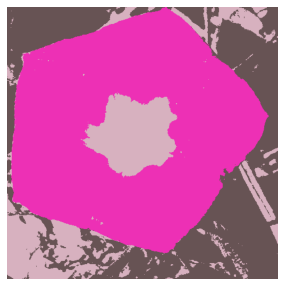

In [4]:
centers = np.uint8(centers)
res = centers[labels.flatten()]
dst = res.reshape(src.shape) #2차원으로 뿌리기
dstrgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(dstrgb)